Discretize PV row sides and indexing
==============================

In this section, we will learn how to:

- create a PV array with discretized PV row sides
- index the surfaces of a PV array
- plot a PV array with indices shown on plot

Imports and settings

In [1]:
# Import external libraries
import matplotlib.pyplot as plt

# Settings
%matplotlib inline

### Prepare PV array parameters

In [2]:
pvarray_parameters = {
    'n_pvrows': 3,            # number of pv rows
    'pvrow_height': 1,        # height of pvrows (measured at center / torque tube)
    'pvrow_width': 1,         # width of pvrows
    'axis_azimuth': 0.,       # azimuth angle of rotation axis
    'surface_tilt': 20.,      # tilt of the pv rows
    'surface_azimuth': 270.,   # azimuth of the pv rows front surface
    'solar_zenith': 40.,      # solar zenith angle
    'solar_azimuth': 150.,    # solar azimuth angle
    'gcr': 0.5,               # ground coverage ratio
}

### Create discretization scheme

In [3]:
discretization = {'cut':{
    0: {'back': 5},  # discretize the back side of the leftmost PV row into 5 segments
    1: {'front': 3}  # discretize the front side of the center PV row into 3 segments
}}
pvarray_parameters.update(discretization)

### Create a PV array

Import the ``OrderedPVArray`` class and create a PV array object using the parameters above

In [4]:
from pvfactors.geometry import OrderedPVArray
# Create pv array
pvarray = OrderedPVArray.transform_from_dict_of_scalars(pvarray_parameters)

Plot the PV array

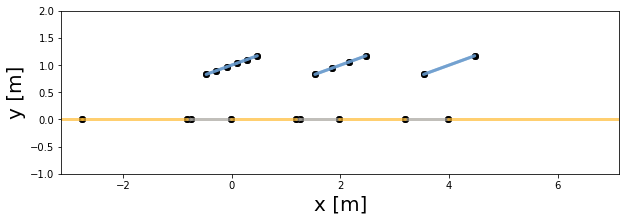

In [5]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 3))
pvarray.plot(ax)
plt.show()

As we can see, there is some discretization on the leftmost and the center PV rows.  
We can check that it was correctly done using the ``pvarray`` object.

In [6]:
pvrow_left = pvarray.pvrows[0]
n_segments = len(pvrow_left.back.list_segments)
print("Back side of leftmost PV row has {} segments".format(n_segments))

Back side of leftmost PV row has 5 segments


In [7]:
pvrow_center = pvarray.pvrows[1]
n_segments = len(pvrow_center.front.list_segments)
print("Front side of center PV row has {} segments".format(n_segments))

Front side of center PV row has 3 segments


### Clarification on segments and surfaces

A clarification needs to be done though: **SEGMENTS are not SURFACES in pvfactors**.  
You can see for instance that the ground geometry has multiple shaded and illuminated surfaces, but it does have only 1 segment.

In [8]:
ground = pvarray.ground
n_segments = len(ground.list_segments)
print("Ground has {} segment".format(n_segments))

Ground has 1 segment


In [9]:
ground_segment = ground.list_segments[0]
n_shaded_surfaces = len(ground_segment.shaded_collection.list_surfaces)
n_illum_surfaces = len(ground_segment.illum_collection.list_surfaces)
print("Ground has {} shaded surfaces".format(n_shaded_surfaces))
print("Ground has {} illuminated surfaces".format(n_illum_surfaces))

Ground has 5 shaded surfaces
Ground has 5 illuminated surfaces


The reason behind this abstraction is that surfaces will always change depending on the solar angles, and shading configuration. But segments will never change, so the user can keep track of particular segments of a PV row side for instance.

### Indexing a PV array

In order to perform some calculations on PV array surfaces, it is sometimes important to index them.  
``pvfactors`` takes care of this.

In [10]:
# Index PV array
pvarray.index_all_surfaces()

So now, we can for instance check the index of the surfaces on the front side of the center PV row

In [11]:
# List some indices
surface_list = pvrow_center.front.all_surfaces
print("Indices of surfaces on front side of center PV row")
for surface in surface_list:
    index = surface.index
    print("... surface index: {}".format(index))

Indices of surfaces on front side of center PV row
... surface index: 16
... surface index: 17
... surface index: 18


As expected, there are 3 surfaces on the front side of the center PV row.

### Plot PV array with indices

It is possible also to visualize the PV surface indices when plotting a PV array.

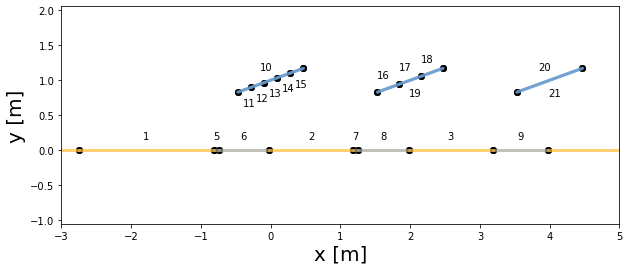

In [12]:
# Plot pvarray shapely geometries with surface indices
f, ax = plt.subplots(figsize=(10, 4))
pvarray.plot(ax, with_index=True)
ax.set_xlim(-3, 5)
plt.show()

As shown above, the surfaces on the front side of the center PV row have indices 16, 17, and 18.  
The ground surfaces indexed 0 (leftmost) and 4 (rightmost) are cut off for plotting convenience.